# 1. IMPORTANDO LIBRERÍAS

In [1]:
%%capture
!pip install -qU langchain langchain_community langchain-google-genai 

In [ ]:
pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

C:\Users\52477\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
import os
from getpass import getpass
api_key = os.getenv('GOOGLE_API_KEY')

In [3]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector = embeddings.embed_query("Hello world")
vector[:5]

[0.04703257977962494,
 -0.04019005596637726,
 -0.02902696467936039,
 -0.026809632778167725,
 0.01892058178782463]

# 2. CARGANDO EL DATASET

In [10]:
dataset = pd.read_excel('dataset.xlsx')

In [11]:
dataset.head()

,ID,cuenta,fecha_hora,fecha_nacimiento,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros
0,1,1,2024-09-21 01:05:14,1985-09-26,39,Chile,Ingeniero Agrónomo,Ciencias agrarias y tecnologías para la agricu...,Enología/ riego y agricultura de precisión,"Machine learning, big data, visión artificial",Tecnología aplicadas a la Agricultura,IA en la educacion,Redes de aprendizaje que ne permitan desarroll...
1,2,1,2024-09-21 01:08:38,1978-04-05,46,Chile,Asesor senior UN Remote Sensing & Climate Chan...,"Remote Sensing, climate change, sustainability...","Gestión hídrica, incendios forestales, sequías...","ML, DL, LLM",IA governance,NaN,"Ampliar conocimientos y redes, colaborar efici..."
2,3,1,2024-09-21 01:15:47,1989-09-28,35,Chile,Ingeniero civil Industrial,"Innovación y Emprendimiento, con foco en tecno...",NaN,Automatización con IA,Innovación tecnológica,Automatización con IA de procesos operativos d...,Lograr tener un emprendimiento con miembros de...
3,4,1,2024-09-21 01:50:59,1990-01-29,34,Mexico,IA Expert y Shihan de Dojo de IA en AT&T Mexico,IA e investigación aplicada a la salud. Princi...,Estudio un máster en dirección de proyectos,Machine Learning y dirección de proyectos,Medicina,Desarrollo y capacitación de personal,Una gran comunidad donde entre todos hagamos c...
4,5,1,2024-09-21 01:51:31,1980-04-09,44,Peru,Docente Investigador,IA,DBA,"Big data, Maching Learning",Especialista en didáctica para mejorar el apre...,"Robótica, física y toda nueva tecnología",Me gustaría formar un equipo líder a nivel mun...


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       125 non-null    int64         
 1   cuenta                   125 non-null    int64         
 2   fecha_hora               125 non-null    datetime64[ns]
 3   fecha_nacimiento         124 non-null    datetime64[ns]
 4   edad                     125 non-null    int64         
 5   pais                     125 non-null    object        
 6   ocupación                125 non-null    object        
 7   especialidad             125 non-null    object        
 8   especialidad_2           123 non-null    object        
 9   interes_dentro_ia_datos  125 non-null    object        
 10  interes_fuera_ia_datos   122 non-null    object        
 11  interes_otro             122 non-null    object        
 12  que _con otros_miembros  123 non-nul

* Se observa que se tienen 14 columnas y 125 filas.
* Tenemos dos tipos de datos: integer y object
* Tenemos presencia de valores nulos en algunas columnas, no son muchos. Se evaluará imputarlos de alguna manera.
* Validamos algunas columnas que no aportan valor.

# 2. PRE - PROCESAMIENTO DE DATOS

## 2.1 ELIMINANDO COLUMNAS

In [13]:
dataset.columns

Index(['ID', 'cuenta', 'fecha_hora', 'fecha_nacimiento', 'edad', 'pais',
       'ocupación', 'especialidad', 'especialidad_2',
       'interes_dentro_ia_datos', 'interes_fuera_ia_datos', 'interes_otro',
       'que _con otros_miembros'],
      dtype='object')

> Las columnas ID y cuenta, decidimos eliminarlas, debido a que no nos aportan valor para el análisis.

In [14]:
dataset = dataset.drop(['ID', 'cuenta'], axis=1)
dataset.head()

,fecha_hora,fecha_nacimiento,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros
0,2024-09-21 01:05:14,1985-09-26,39,Chile,Ingeniero Agrónomo,Ciencias agrarias y tecnologías para la agricu...,Enología/ riego y agricultura de precisión,"Machine learning, big data, visión artificial",Tecnología aplicadas a la Agricultura,IA en la educacion,Redes de aprendizaje que ne permitan desarroll...
1,2024-09-21 01:08:38,1978-04-05,46,Chile,Asesor senior UN Remote Sensing & Climate Chan...,"Remote Sensing, climate change, sustainability...","Gestión hídrica, incendios forestales, sequías...","ML, DL, LLM",IA governance,NaN,"Ampliar conocimientos y redes, colaborar efici..."
2,2024-09-21 01:15:47,1989-09-28,35,Chile,Ingeniero civil Industrial,"Innovación y Emprendimiento, con foco en tecno...",NaN,Automatización con IA,Innovación tecnológica,Automatización con IA de procesos operativos d...,Lograr tener un emprendimiento con miembros de...
3,2024-09-21 01:50:59,1990-01-29,34,Mexico,IA Expert y Shihan de Dojo de IA en AT&T Mexico,IA e investigación aplicada a la salud. Princi...,Estudio un máster en dirección de proyectos,Machine Learning y dirección de proyectos,Medicina,Desarrollo y capacitación de personal,Una gran comunidad donde entre todos hagamos c...
4,2024-09-21 01:51:31,1980-04-09,44,Peru,Docente Investigador,IA,DBA,"Big data, Maching Learning",Especialista en didáctica para mejorar el apre...,"Robótica, física y toda nueva tecnología",Me gustaría formar un equipo líder a nivel mun...


## 2.2 VALORES DUPLICADOS

In [15]:
dataset.duplicated().sum()

0

* No hay presencia de filas duplicadas

## 2.3 VALORES NULOS

* Verificamos en nuestra matriz de nulos, la distribución de los valores nulos a lo largo de nuestro dataset.
* Validamos la existencia de correspondencia de filas y valores nulos para las múltiples columnas.

<AxesSubplot:>

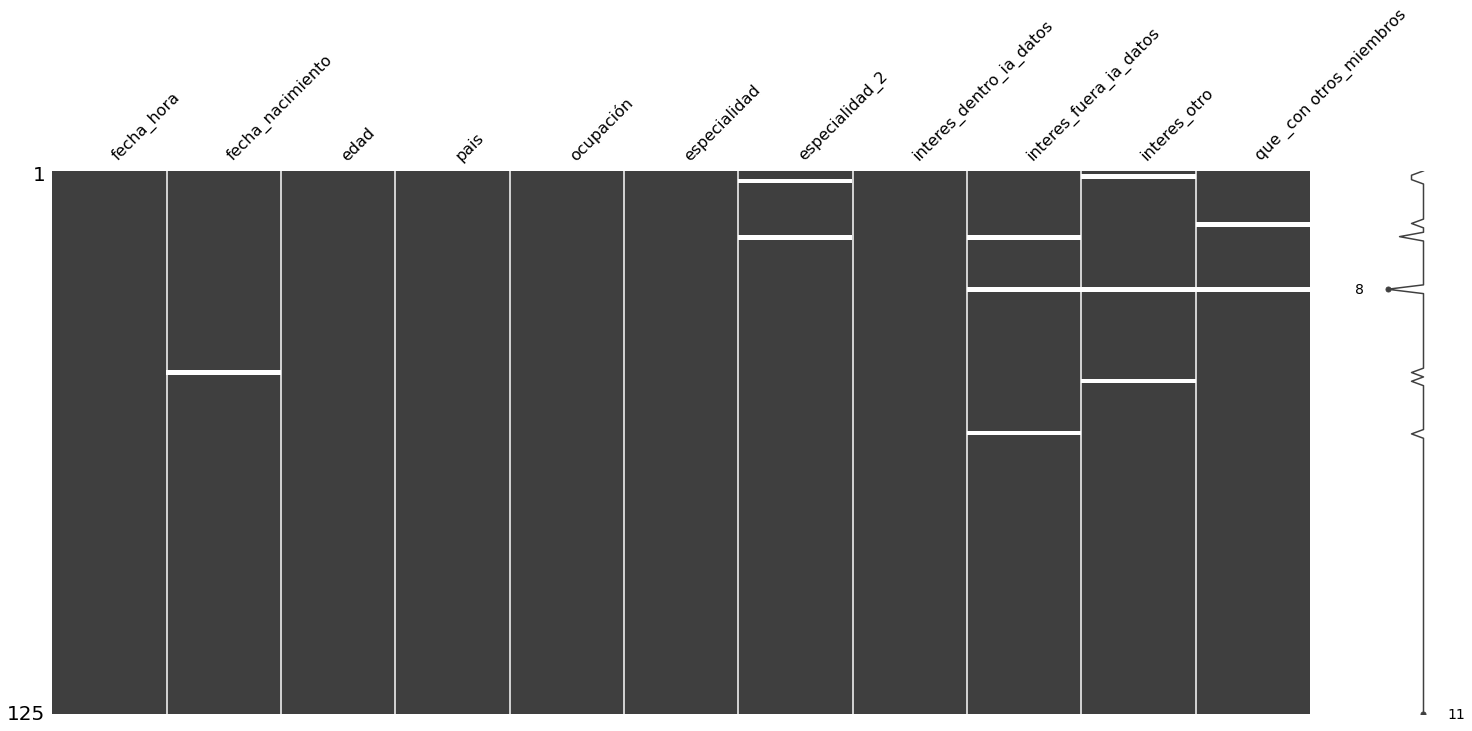

In [16]:
msno.matrix(dataset)

* Notamos que los valores nulos vienen de columnas donde es dable que no tenga respuesta, ya que quizás no tenia una idea clara en el momento o simplemente no quizo responder. Se completará con "No Aplica" o "Sin Respuesta".
* Por otro lado, en la columna de fecha de nacimiento, al no tener valor correcto, nos afecta a la columna edad. Por consiguiente, decidimos eliminar esta fila, y al ser solo una fila, consideramos que no afectará a todo nuestro conjunto.

In [17]:
dataset.columns

Index(['fecha_hora', 'fecha_nacimiento', 'edad', 'pais', 'ocupación',
       'especialidad', 'especialidad_2', 'interes_dentro_ia_datos',
       'interes_fuera_ia_datos', 'interes_otro', 'que _con otros_miembros'],
      dtype='object')

In [18]:
## Colocando "Sin Respuesta", a los valores nulos de algunas columnas
dataset_pre = dataset.copy()
dataset_pre['especialidad_2'] = dataset_pre['especialidad_2'].fillna('Sin Respuesta')
dataset_pre['interes_fuera_ia_datos'] = dataset_pre['interes_fuera_ia_datos'].fillna('Sin Respuesta')
dataset_pre['interes_otro'] = dataset_pre['interes_otro'].fillna('Sin Respuesta')
dataset_pre['que _con otros_miembros'] = dataset_pre['que _con otros_miembros'].fillna('Sin Respuesta')

In [19]:
# dataset_pre = dataset_pre.dropna(subset=['fecha_nacimiento'])
dataset_pre['fecha_nacimiento'] = pd.to_datetime(dataset_pre['fecha_nacimiento'])
dataset_pre['fecha_hora'] = pd.to_datetime(dataset_pre['fecha_hora'])

In [20]:
dataset_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha_hora               125 non-null    datetime64[ns]
 1   fecha_nacimiento         124 non-null    datetime64[ns]
 2   edad                     125 non-null    int64         
 3   pais                     125 non-null    object        
 4   ocupación                125 non-null    object        
 5   especialidad             125 non-null    object        
 6   especialidad_2           125 non-null    object        
 7   interes_dentro_ia_datos  125 non-null    object        
 8   interes_fuera_ia_datos   125 non-null    object        
 9   interes_otro             125 non-null    object        
 10  que _con otros_miembros  125 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 10.9+ KB


* Notamos que existe un nulo en fecha de nacimiento. Tenemos que verificarlo.
* Por consiguiente en edad, debería también existir un error, debido a que la edad se calcula con la fecha de nacimiento. Se verificará.

### 2.3.1 VERIFICANDO COLUMNA EDAD

In [21]:
dataset_pre['edad'].unique()

array([39, 46, 35, 34, 44, 28, 59, 33, 56, 36, 26, 37, 42,  0, 24, 25, 29,
       31, -1, 55, 49, 23, 43, 30, 51, 22, 47, 27, 45, 32, 76, 70, 38, 62,
       20, 21, 19, 52, 48, 53, 54, 50, 40], dtype=int64)

* Observamos que existen dos valores raros, los cuales nos indican que se llenaron mal las fechas de nacimientos. Como no queremos eliminar valores, consideramos realizar una imputación por promedio.

In [22]:
## Verificando los índices donde se tiene los valores de edad 0
dataset_pre[dataset_pre['edad'] == 0]

,fecha_hora,fecha_nacimiento,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros
14,2024-09-22 02:46:43,2024-09-22,0,Venezuela,Consultor estadistico,Estadística,Ciberseguridad,Big data y machine learning,Temas estadistica,Impacto de la IA en los negocios emergentes,Hacer una retroalimentación en dónde aprendam...
46,2024-09-23 03:55:31,NaT,0,Colombia,Analista de Datos,Logística,Logística,Data science,Ecommerce,Programación,Profesionalismo
101,2024-10-03 02:21:44,2024-02-24,0,Chile,Analista de seguridad dela información,Seguridad de la información,Ciberseguridad,Machine Learning,Érica en la tecnología,Privacidad de datos,Consolidar una comunidad referente para Latino...


In [23]:
## Verificando los índices donde se tiene los valores de edad -1
dataset_pre[dataset_pre['edad'] == -1]

,fecha_hora,fecha_nacimiento,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros
19,2024-09-22 11:20:47,2024-12-06,-1,Chile,"Asesor, Ingeniero de Recursos Energéticos","Recursos, Energía, Principios de IA","Web dev, Domotica, Robótica, Diseño Industrial...","ML, DL(video, etc.), MLOPs, GenIA, LLM/RAG, Ge...",Quantum tech,"Climate tech, Machine learning aplicado a la e...",Lograr un evento tipo hackathon


In [24]:
## Consiguiendo los índices de ambos
indices_edad_0 = dataset_pre[dataset_pre['edad'] == 0].index
indices_edad_neg1 = dataset_pre[dataset_pre['edad'] == -1].index
indices_correctos = indices_edad_0.union(indices_edad_neg1)
indices_correctos

Index([14, 19, 46, 101], dtype='int64')

* Recordar que una cosa son los índices y otra la posición. Se empieza el índice desde cero. Por ende, se le tendrá que sumar +1.

In [25]:
# Filtrar edades válidas (diferentes de 0 y -1) y sacamos la media
edades_validas = dataset_pre['edad'][(dataset_pre['edad'] != 0) & (dataset_pre['edad'] != -1)]
edades_validad_mean = edades_validas.mean()
int(edades_validad_mean)

37

In [26]:
## Reemplazamos los valores 0 y -1 por NaN
dataset_pre.loc[dataset_pre['edad'] == 0, 'edad'] = np.nan
dataset_pre.loc[dataset_pre['edad'] == -1, 'edad'] = np.nan

In [27]:
dataset_pre['edad'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: edad
Non-Null Count  Dtype  
--------------  -----  
121 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


* Observamos que se convirtieron correctamente estos valores a NaN, 4 nulos

In [28]:
dataset_pre.iloc[indices_correctos]

,fecha_hora,fecha_nacimiento,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros
14,2024-09-22 02:46:43,2024-09-22,NaN,Venezuela,Consultor estadistico,Estadística,Ciberseguridad,Big data y machine learning,Temas estadistica,Impacto de la IA en los negocios emergentes,Hacer una retroalimentación en dónde aprendam...
19,2024-09-22 11:20:47,2024-12-06,NaN,Chile,"Asesor, Ingeniero de Recursos Energéticos","Recursos, Energía, Principios de IA","Web dev, Domotica, Robótica, Diseño Industrial...","ML, DL(video, etc.), MLOPs, GenIA, LLM/RAG, Ge...",Quantum tech,"Climate tech, Machine learning aplicado a la e...",Lograr un evento tipo hackathon
46,2024-09-23 03:55:31,NaT,NaN,Colombia,Analista de Datos,Logística,Logística,Data science,Ecommerce,Programación,Profesionalismo
101,2024-10-03 02:21:44,2024-02-24,NaN,Chile,Analista de seguridad dela información,Seguridad de la información,Ciberseguridad,Machine Learning,Érica en la tecnología,Privacidad de datos,Consolidar una comunidad referente para Latino...


* Validamos que se haya realizado correctamente, con los índices.

In [29]:
## Completamos los valores nulos con las edades medias
dataset_pre['edad'] = dataset_pre['edad'].fillna(int(edades_validad_mean))

In [30]:
## Convertimos a enteros nuevamente la columna
dataset_pre['edad'] = dataset_pre['edad'].astype(int)
dataset_pre['edad'].unique()

array([39, 46, 35, 34, 44, 28, 59, 33, 56, 36, 26, 37, 42, 24, 25, 29, 31,
       55, 49, 23, 43, 30, 51, 22, 47, 27, 45, 32, 76, 70, 38, 62, 20, 21,
       19, 52, 48, 53, 54, 50, 40])

* Imputación realizada correctamente.

### 2.3.2 VERIFICANDO COLUMNA FECHA_NACIMIENTO

In [31]:
dataset_pre['fecha_nacimiento'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: fecha_nacimiento
Non-Null Count  Dtype         
--------------  -----         
124 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


* Se valida un valor nulo.
* Se observo cuando se analizó la columna edad, en el índice 46.

In [32]:
dataset_pre.iloc[46]

fecha_hora                 2024-09-23 03:55:31
fecha_nacimiento                           NaT
edad                                        37
pais                                 Colombia 
ocupación                   Analista de Datos 
especialidad                        Logística 
especialidad_2                      Logística 
interes_dentro_ia_datos          Data science 
interes_fuera_ia_datos               Ecommerce
interes_otro                     Programación 
que _con otros_miembros       Profesionalismo 
Name: 46, dtype: object

* Pero es importante tener en cuenta que si bien solo esta fila me indica que hay valor nulo, cuando convertimos las edades, existian 0 y -1, lo cual nos indica que las fechas de nacimiento para estos índices estaban mal.
* Tenemos que corregir estos 4 valores de fechas de nacimiento.
* Como no es tan preciso conseguir un día de nacimiento, solo analizaremos el año y el mes, los cuales trataremos de conseguirlos restante las edades en el caso del año, y corrigiendo por el más frecuente en el caso del mes.

In [33]:
dataset_pre['fecha_nacimiento'].unique()

<DatetimeArray>
['1985-09-26 00:00:00', '1978-04-05 00:00:00', '1989-09-28 00:00:00',
 '1990-01-29 00:00:00', '1980-04-09 00:00:00', '1996-03-16 00:00:00',
 '1965-08-11 00:00:00', '1991-08-09 00:00:00', '1968-07-25 00:00:00',
 '1988-07-11 00:00:00',
 ...
 '1975-08-15 00:00:00', '1991-09-19 00:00:00', '2000-09-01 00:00:00',
 '1996-03-07 00:00:00', '1974-05-25 00:00:00', '2001-09-28 00:00:00',
 '1986-05-24 00:00:00', '1984-10-08 00:00:00', '1981-04-14 00:00:00',
 '1999-12-14 00:00:00']
Length: 122, dtype: datetime64[ns]

In [34]:
dataset_pre['fecha_hora'].unique()

<DatetimeArray>
['2024-09-21 01:05:14', '2024-09-21 01:08:38', '2024-09-21 01:15:47',
 '2024-09-21 01:50:59', '2024-09-21 01:51:31', '2024-09-21 02:04:30',
 '2024-09-21 04:06:48', '2024-09-21 04:28:59', '2024-09-21 05:17:36',
 '2024-09-21 10:29:33',
 ...
 '2024-10-05 06:20:03', '2024-10-05 07:51:08', '2024-10-05 09:12:02',
 '2024-10-06 10:33:46', '2024-10-06 01:09:08', '2024-10-06 05:19:02',
 '2024-10-07 09:44:55', '2024-10-07 10:18:18', '2024-10-07 11:36:49',
 '2024-10-07 04:16:34']
Length: 125, dtype: datetime64[ns]

In [35]:
# Extraemos el mes y año de nacimiento, asi como fecha y hora de llenado de encuesta, todo en nuevas columnas
dataset_pre['mes_nacimiento'] = dataset_pre['fecha_nacimiento'].dt.month
dataset_pre['año_nacimiento'] = dataset_pre['fecha_nacimiento'].dt.year
dataset_pre['fecha_encuesta'] = dataset_pre['fecha_hora'].dt.date
dataset_pre['hora_encuesta'] = dataset_pre['fecha_hora'].dt.time

In [36]:
## Eliminamos las columnas de fecha_nacimiento y fecha_hora
dataset_pre = dataset_pre.drop(['fecha_nacimiento', 'fecha_hora'], axis=1)

In [37]:
dataset_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     125 non-null    int32  
 1   pais                     125 non-null    object 
 2   ocupación                125 non-null    object 
 3   especialidad             125 non-null    object 
 4   especialidad_2           125 non-null    object 
 5   interes_dentro_ia_datos  125 non-null    object 
 6   interes_fuera_ia_datos   125 non-null    object 
 7   interes_otro             125 non-null    object 
 8   que _con otros_miembros  125 non-null    object 
 9   mes_nacimiento           124 non-null    float64
 10  año_nacimiento           124 non-null    float64
 11  fecha_encuesta           125 non-null    object 
 12  hora_encuesta            125 non-null    object 
dtypes: float64(2), int32(1), object(10)
memory usage: 12.3+ KB


In [38]:
dataset_pre[['mes_nacimiento','año_nacimiento']].iloc[indices_correctos]

,mes_nacimiento,año_nacimiento
14,9.0,2024.0
19,12.0,2024.0
46,NaN,NaN
101,2.0,2024.0


* Se visualiza algunas correcciones que se tienen que hacer en estos índices para estas columnas.

In [39]:
dataset_pre_2 = dataset_pre.copy()

In [40]:
## Completamos el valor nulo con el más frecuente
dataset_pre_2['mes_nacimiento'] = dataset_pre_2['mes_nacimiento'].fillna(dataset_pre['mes_nacimiento'].value_counts().reset_index()['mes_nacimiento'].iloc[0])

In [41]:
dataset_pre_2[['mes_nacimiento', 'año_nacimiento', 'edad']].iloc[indices_correctos]

,mes_nacimiento,año_nacimiento,edad
14,9.0,2024.0,37
19,12.0,2024.0,37
46,12.0,NaN,37
101,2.0,2024.0,37


In [42]:
# El año 2024  y el Nan se corrigen en el año de nacimiento, restando por la edad promedio conseguida
dataset_pre_2['año_nacimiento'] = dataset_pre_2['año_nacimiento'].fillna(2024.0 - int(dataset_pre['edad'].mean()))
dataset_pre_2['año_nacimiento'] = dataset_pre_2['año_nacimiento'].apply(lambda x: 2024.0 - int(dataset_pre['edad'].mean()) if x == 2024.0 else x)

In [43]:
dataset_pre_2[['mes_nacimiento', 'año_nacimiento', 'edad']].iloc[indices_correctos]

,mes_nacimiento,año_nacimiento,edad
14,9.0,1987.0,37
19,12.0,1987.0,37
46,12.0,1987.0,37
101,2.0,1987.0,37


* Se corrobora que se realizó la imputación y corrección de forma satisfactoria.

**VALIDANDO LOS VALORES ÚNICOS DE LAS COLUMNAS ANALIZADAS**

In [44]:
dataset_pre_2['mes_nacimiento'].unique()

array([ 9.,  4.,  1.,  3.,  8.,  7., 10., 11., 12.,  6.,  5.,  2.])

In [45]:
dataset_pre_2['año_nacimiento'].unique()

array([1985., 1978., 1989., 1990., 1980., 1996., 1965., 1991., 1968.,
       1988., 1998., 1987., 1981., 1999., 1995., 1993., 1969., 1975.,
       2001., 1994., 1972., 2002., 1986., 1977., 1997., 1948., 1954.,
       1962., 2003., 1979., 1984., 2000., 1973., 1982., 2005., 1971.,
       1976., 1970., 1992., 1974.])

### 2.3.3 VERIFICANDO COLUMNA PAÍS

In [46]:
dataset_pre_2['pais'].unique()

array(['Chile', 'Mexico', 'Peru', 'CHILE', 'Argentina ', 'Venezuela ',
       'Chile ', 'Ecuador', 'Colombia ', 'Argentina', 'Colombia',
       'Bolivia ', 'Bolivia', 'Costa Rica ', 'El Salvador ',
       'Republica Dominicana', 'El Salvador', 'España', 'Ecuador ',
       'Venezuela'], dtype=object)

* Observamos que existen países que se repiten, pero con diferente forma de escritura. Mayúscula, minúscula y espacios en blanco.
* Se corregirá esta parte.

In [47]:
dataset_pre_2['pais'].apply(lambda x: x.lower().strip()).unique()

array(['chile', 'mexico', 'peru', 'argentina', 'venezuela', 'ecuador',
       'colombia', 'bolivia', 'costa rica', 'el salvador',
       'republica dominicana', 'españa'], dtype=object)

In [48]:
dataset_pre_2['pais'] = dataset_pre_2['pais'].apply(lambda x: x.lower().strip())

## 2.4 MODIFICANDO TIPOS DE DATOS

In [49]:
dataset_final = dataset_pre_2.copy()
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     125 non-null    int32  
 1   pais                     125 non-null    object 
 2   ocupación                125 non-null    object 
 3   especialidad             125 non-null    object 
 4   especialidad_2           125 non-null    object 
 5   interes_dentro_ia_datos  125 non-null    object 
 6   interes_fuera_ia_datos   125 non-null    object 
 7   interes_otro             125 non-null    object 
 8   que _con otros_miembros  125 non-null    object 
 9   mes_nacimiento           125 non-null    float64
 10  año_nacimiento           125 non-null    float64
 11  fecha_encuesta           125 non-null    object 
 12  hora_encuesta            125 non-null    object 
dtypes: float64(2), int32(1), object(10)
memory usage: 12.3+ KB


* Tenemos que convertir la fecha_encuesta a datetime.
* Convertir mes y año nacimiento a integer.
* Por último la Hora de encuesta a time.
* Ya no tenemos presencia de valores nulos.

In [50]:
dataset_final['fecha_encuesta'] = pd.to_datetime(dataset_final['fecha_encuesta'])
dataset_final['año_nacimiento'] = dataset_final['año_nacimiento'].astype(int)
dataset_final['mes_nacimiento'] = dataset_final['mes_nacimiento'].astype(int)
dataset_final['hora_encuesta'] = pd.to_datetime(dataset_final['hora_encuesta'], format='%H:%M:%S').dt.time

In [51]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   edad                     125 non-null    int32         
 1   pais                     125 non-null    object        
 2   ocupación                125 non-null    object        
 3   especialidad             125 non-null    object        
 4   especialidad_2           125 non-null    object        
 5   interes_dentro_ia_datos  125 non-null    object        
 6   interes_fuera_ia_datos   125 non-null    object        
 7   interes_otro             125 non-null    object        
 8   que _con otros_miembros  125 non-null    object        
 9   mes_nacimiento           125 non-null    int32         
 10  año_nacimiento           125 non-null    int32         
 11  fecha_encuesta           125 non-null    datetime64[ns]
 12  hora_encuesta            125 non-nul

In [52]:
dataset_final.head(10)

,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros,mes_nacimiento,año_nacimiento,fecha_encuesta,hora_encuesta
0,39,chile,Ingeniero Agrónomo,Ciencias agrarias y tecnologías para la agricu...,Enología/ riego y agricultura de precisión,"Machine learning, big data, visión artificial",Tecnología aplicadas a la Agricultura,IA en la educacion,Redes de aprendizaje que ne permitan desarroll...,9,1985,2024-09-21,01:05:14
1,46,chile,Asesor senior UN Remote Sensing & Climate Chan...,"Remote Sensing, climate change, sustainability...","Gestión hídrica, incendios forestales, sequías...","ML, DL, LLM",IA governance,Sin Respuesta,"Ampliar conocimientos y redes, colaborar efici...",4,1978,2024-09-21,01:08:38
2,35,chile,Ingeniero civil Industrial,"Innovación y Emprendimiento, con foco en tecno...",Sin Respuesta,Automatización con IA,Innovación tecnológica,Automatización con IA de procesos operativos d...,Lograr tener un emprendimiento con miembros de...,9,1989,2024-09-21,01:15:47
3,34,mexico,IA Expert y Shihan de Dojo de IA en AT&T Mexico,IA e investigación aplicada a la salud. Princi...,Estudio un máster en dirección de proyectos,Machine Learning y dirección de proyectos,Medicina,Desarrollo y capacitación de personal,Una gran comunidad donde entre todos hagamos c...,1,1990,2024-09-21,01:50:59
4,44,peru,Docente Investigador,IA,DBA,"Big data, Maching Learning",Especialista en didáctica para mejorar el apre...,"Robótica, física y toda nueva tecnología",Me gustaría formar un equipo líder a nivel mun...,4,1980,2024-09-21,01:51:31
5,28,chile,Ingeniero industrial actualmente trabajando co...,"Python y ciencia de datos , java con springboo...",Área de interés Ingeniería de datos,Big data y machine learning,Innovación en campos sociales,"Automatización de algunos juegos , investigand...",Lograr formar una startup y lograr promover el...,3,1996,2024-09-21,02:04:30
6,59,chile,Consultor en compras del estado de Chile,Ciencias Sociales,Bases de datos SQL,"Analisis de Textos, Procesamiento de Lenguaje ...",Analisis desde Ciencias Sociales,Hacia donde va el futuro de la IA,Me gustaría aportar mi mirada de Cientista soc...,8,1965,2024-09-21,04:06:48
7,33,argentina,Estudiante de Tecnicatura Analista Programador...,Programación y Análisis de Datos,Inteligencia Artificial y Robotica,Machine Learning y Big Data,Robotica y Programación,La modernización de la educación junto a la IA,Generar una comunidad colaborativa y organizar...,8,1991,2024-09-21,04:28:59
8,56,argentina,"Médico, Especialista en RRHH, DocenteMedi","Medicina, IA en salud, Investigación, Docencia",Gestión de Proyectos,Ciencia de Datos e IA aplicada a la gestión y ...,"Arte Digital, Innovación en Salud",Desarrollarme como experto en IA en Salud y en...,"Gestionar proyectos, abordar desde la fortalez...",7,1968,2024-09-21,05:17:36
9,36,chile,Analista Programador.,Desarrollo con integración de IA,Poseo estudios Universitarios de Salud,Entrenamiento de IA,Innovación en salud y detección satelital de m...,Desarrollo personalizado,Entrenamiento de redes neuronales a pedido por...,7,1988,2024-09-21,10:29:33


## 2.5 FEATURE ENGINEERING

In [53]:
dataset_final['hora_encuesta'][0].hour

1

In [54]:
## Categorizando el periodo de la encuesta, para ver el horario de tiempo libre de los encuestados
def categorizar_horario(hora):
    if 0 <= hora.hour < 6:
        return 'Madrugada'
    elif 6 <= hora.hour < 12:
        return 'Mañana'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

dataset_final['periodo_encuesta'] = dataset_final['hora_encuesta'].apply(categorizar_horario)

In [55]:
dataset_final['año_nacimiento'].min(), dataset_final['año_nacimiento'].max()

(1948, 2005)

In [56]:
## Categorizando la decada de los integrantes de la encuesta

def categorizar_decada(año):
    if año < 1950:
        return '1940s'
    elif año < 1960:
        return '1950s'
    elif año < 1970:
        return '1960s'
    elif año < 1980:
        return '1970s'
    elif año < 1990:
        return '1980s'
    elif año < 2000:
        return '1990s'
    else:
        return '2000s'

dataset_final['decada'] = dataset_final['año_nacimiento'].apply(categorizar_decada)

In [57]:
dataset_final.head()

,edad,pais,ocupación,especialidad,especialidad_2,interes_dentro_ia_datos,interes_fuera_ia_datos,interes_otro,que _con otros_miembros,mes_nacimiento,año_nacimiento,fecha_encuesta,hora_encuesta,periodo_encuesta,decada
0,39,chile,Ingeniero Agrónomo,Ciencias agrarias y tecnologías para la agricu...,Enología/ riego y agricultura de precisión,"Machine learning, big data, visión artificial",Tecnología aplicadas a la Agricultura,IA en la educacion,Redes de aprendizaje que ne permitan desarroll...,9,1985,2024-09-21,01:05:14,Madrugada,1980s
1,46,chile,Asesor senior UN Remote Sensing & Climate Chan...,"Remote Sensing, climate change, sustainability...","Gestión hídrica, incendios forestales, sequías...","ML, DL, LLM",IA governance,Sin Respuesta,"Ampliar conocimientos y redes, colaborar efici...",4,1978,2024-09-21,01:08:38,Madrugada,1970s
2,35,chile,Ingeniero civil Industrial,"Innovación y Emprendimiento, con foco en tecno...",Sin Respuesta,Automatización con IA,Innovación tecnológica,Automatización con IA de procesos operativos d...,Lograr tener un emprendimiento con miembros de...,9,1989,2024-09-21,01:15:47,Madrugada,1980s
3,34,mexico,IA Expert y Shihan de Dojo de IA en AT&T Mexico,IA e investigación aplicada a la salud. Princi...,Estudio un máster en dirección de proyectos,Machine Learning y dirección de proyectos,Medicina,Desarrollo y capacitación de personal,Una gran comunidad donde entre todos hagamos c...,1,1990,2024-09-21,01:50:59,Madrugada,1990s
4,44,peru,Docente Investigador,IA,DBA,"Big data, Maching Learning",Especialista en didáctica para mejorar el apre...,"Robótica, física y toda nueva tecnología",Me gustaría formar un equipo líder a nivel mun...,4,1980,2024-09-21,01:51:31,Madrugada,1980s


## 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## EMBEDDINGS

In [58]:
interes_dentro_ia = dataset['interes_dentro_ia_datos'].apply(lambda x: x.lower()).value_counts()
interes_dentro_ia

interes_dentro_ia_datos
machine learning                                                  23
machine learning                                                   6
big data                                                           5
procesamiento de lenguaje natural                                  4
deep learning                                                      3
                                                                  ..
big data y como darle un uso a esos datos                          1
conozco muy poco del tema, me interesa ampliar mi conocimiento     1
análisis de datos                                                  1
visión por computadora                                             1
big data, ingeniería de datos                                      1
Name: count, Length: 86, dtype: int64

In [59]:
interes_dentro_ia = dataset['interes_dentro_ia_datos'].apply(lambda x: x.lower())
interes_dentro_ia

0      machine learning, big data, visión artificial 
1                                         ml, dl, llm
2                               automatización con ia
3          machine learning y dirección de proyectos 
4                          big data, maching learning
                            ...                      
120                                  machine learning
121      estoy conociendo aun, ninguna en específico 
122                                  machine learning
123                 procesamiento de lenguaje natural
124                     big data, ingeniería de datos
Name: interes_dentro_ia_datos, Length: 125, dtype: object

In [60]:
interes_dentro_ia['interes_dentro_ia_datos'] = interes_dentro_ia['interes_dentro_ia_datos'].astype(str)
interes_dentro_ia['embeddings'] = interes_dentro_ia.apply(lambda x: embeddings.embed_query(x))
interes_dentro_ia

KeyError: 'interes_dentro_ia_datos'

In [ ]:
# Generar embeddings para cada elemento de la columna
interes_dentro_ia_embeddings = [embeddings.embed_query(text) for text in interes_dentro_ia.tolist()]
interes_dentro_ia_embeddings

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(interes_dentro_ia_embeddings)

125

In [ ]:
interes_dentro_ia_embeddings[0]

[0.019508451223373413,
 -0.04228626936674118,
 -0.004883186891674995,
 0.016853269189596176,
 0.05234789103269577,
 0.0195035208016634,
 -0.017169659957289696,
 -0.00032540084794163704,
 -0.01943739503622055,
 -0.00014280143659561872,
 0.0331505611538887,
 0.0194459967315197,
 -0.04747364670038223,
 -0.03484040126204491,
 0.025667041540145874,
 -0.035353463143110275,
 -0.03189387917518616,
 0.010007310658693314,
 -0.01175021193921566,
 -0.010245254263281822,
 0.021421033889055252,
 -0.019620655104517937,
 -0.008467157371342182,
 -0.08196131885051727,
 -0.005933965090662241,
 0.024584809318184853,
 0.036706771701574326,
 -0.04529116302728653,
 -0.00566738098859787,
 0.05915527790784836,
 -0.06846095621585846,
 0.004293183330446482,
 -0.017242174595594406,
 0.0005833686445839703,
 0.03284592181444168,
 -0.04350930452346802,
 -0.006853421684354544,
 0.02031826414167881,
 0.04030318930745125,
 0.006624102592468262,
 0.0034330282360315323,
 -0.05560486018657684,
 -0.030314430594444275,
 -0.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similitud coseno
similaridad = cosine_similarity(interes_dentro_ia_embeddings)

In [ ]:
similaridad_2 = pd.DataFrame(similaridad)
similaridad_2

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,1.000000,0.590746,0.696803,0.840682,0.873026,0.793841,0.747880,0.889382,0.747795,0.624890,...,0.809520,0.680111,0.834064,0.664631,0.668742,0.834064,0.600952,0.834064,0.664631,0.868201
1,0.590746,1.000000,0.540839,0.592362,0.619516,0.627317,0.572861,0.641383,0.520933,0.578510,...,0.593822,0.587145,0.666523,0.599655,0.599135,0.666523,0.541874,0.666523,0.599655,0.577146
2,0.696803,0.540839,1.000000,0.691763,0.641929,0.608791,0.698030,0.668553,0.711632,0.784540,...,0.615156,0.580869,0.664313,0.669818,0.668397,0.664313,0.571871,0.664313,0.669818,0.697060
3,0.840682,0.592362,0.691763,1.000000,0.785976,0.732138,0.734169,0.827430,0.749462,0.623983,...,0.670351,0.730904,0.826373,0.674967,0.675466,0.826373,0.610423,0.826373,0.674967,0.771131
4,0.873026,0.619516,0.641929,0.785976,1.000000,0.868094,0.660935,0.918103,0.680596,0.566531,...,0.890124,0.729022,0.884933,0.596120,0.599419,0.884933,0.528501,0.884933,0.596120,0.837914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.834064,0.666523,0.664313,0.826373,0.884933,0.812813,0.677917,0.874118,0.652535,0.595114,...,0.772945,0.764532,1.000000,0.630928,0.627924,1.000000,0.551581,1.000000,0.630928,0.733755
121,0.600952,0.541874,0.571871,0.610423,0.528501,0.532676,0.618743,0.577522,0.575583,0.625670,...,0.501085,0.530290,0.551581,0.624906,0.639070,0.551581,1.000000,0.551581,0.624906,0.605110
122,0.834064,0.666523,0.664313,0.826373,0.884933,0.812813,0.677917,0.874118,0.652535,0.595114,...,0.772945,0.764532,1.000000,0.630928,0.627924,1.000000,0.551581,1.000000,0.630928,0.733755
123,0.664631,0.599655,0.669818,0.674967,0.596120,0.580955,0.896805,0.644908,0.668730,0.654444,...,0.575023,0.574278,0.630928,1.000000,0.989590,0.630928,0.624906,0.630928,1.000000,0.698699


<Axes: >

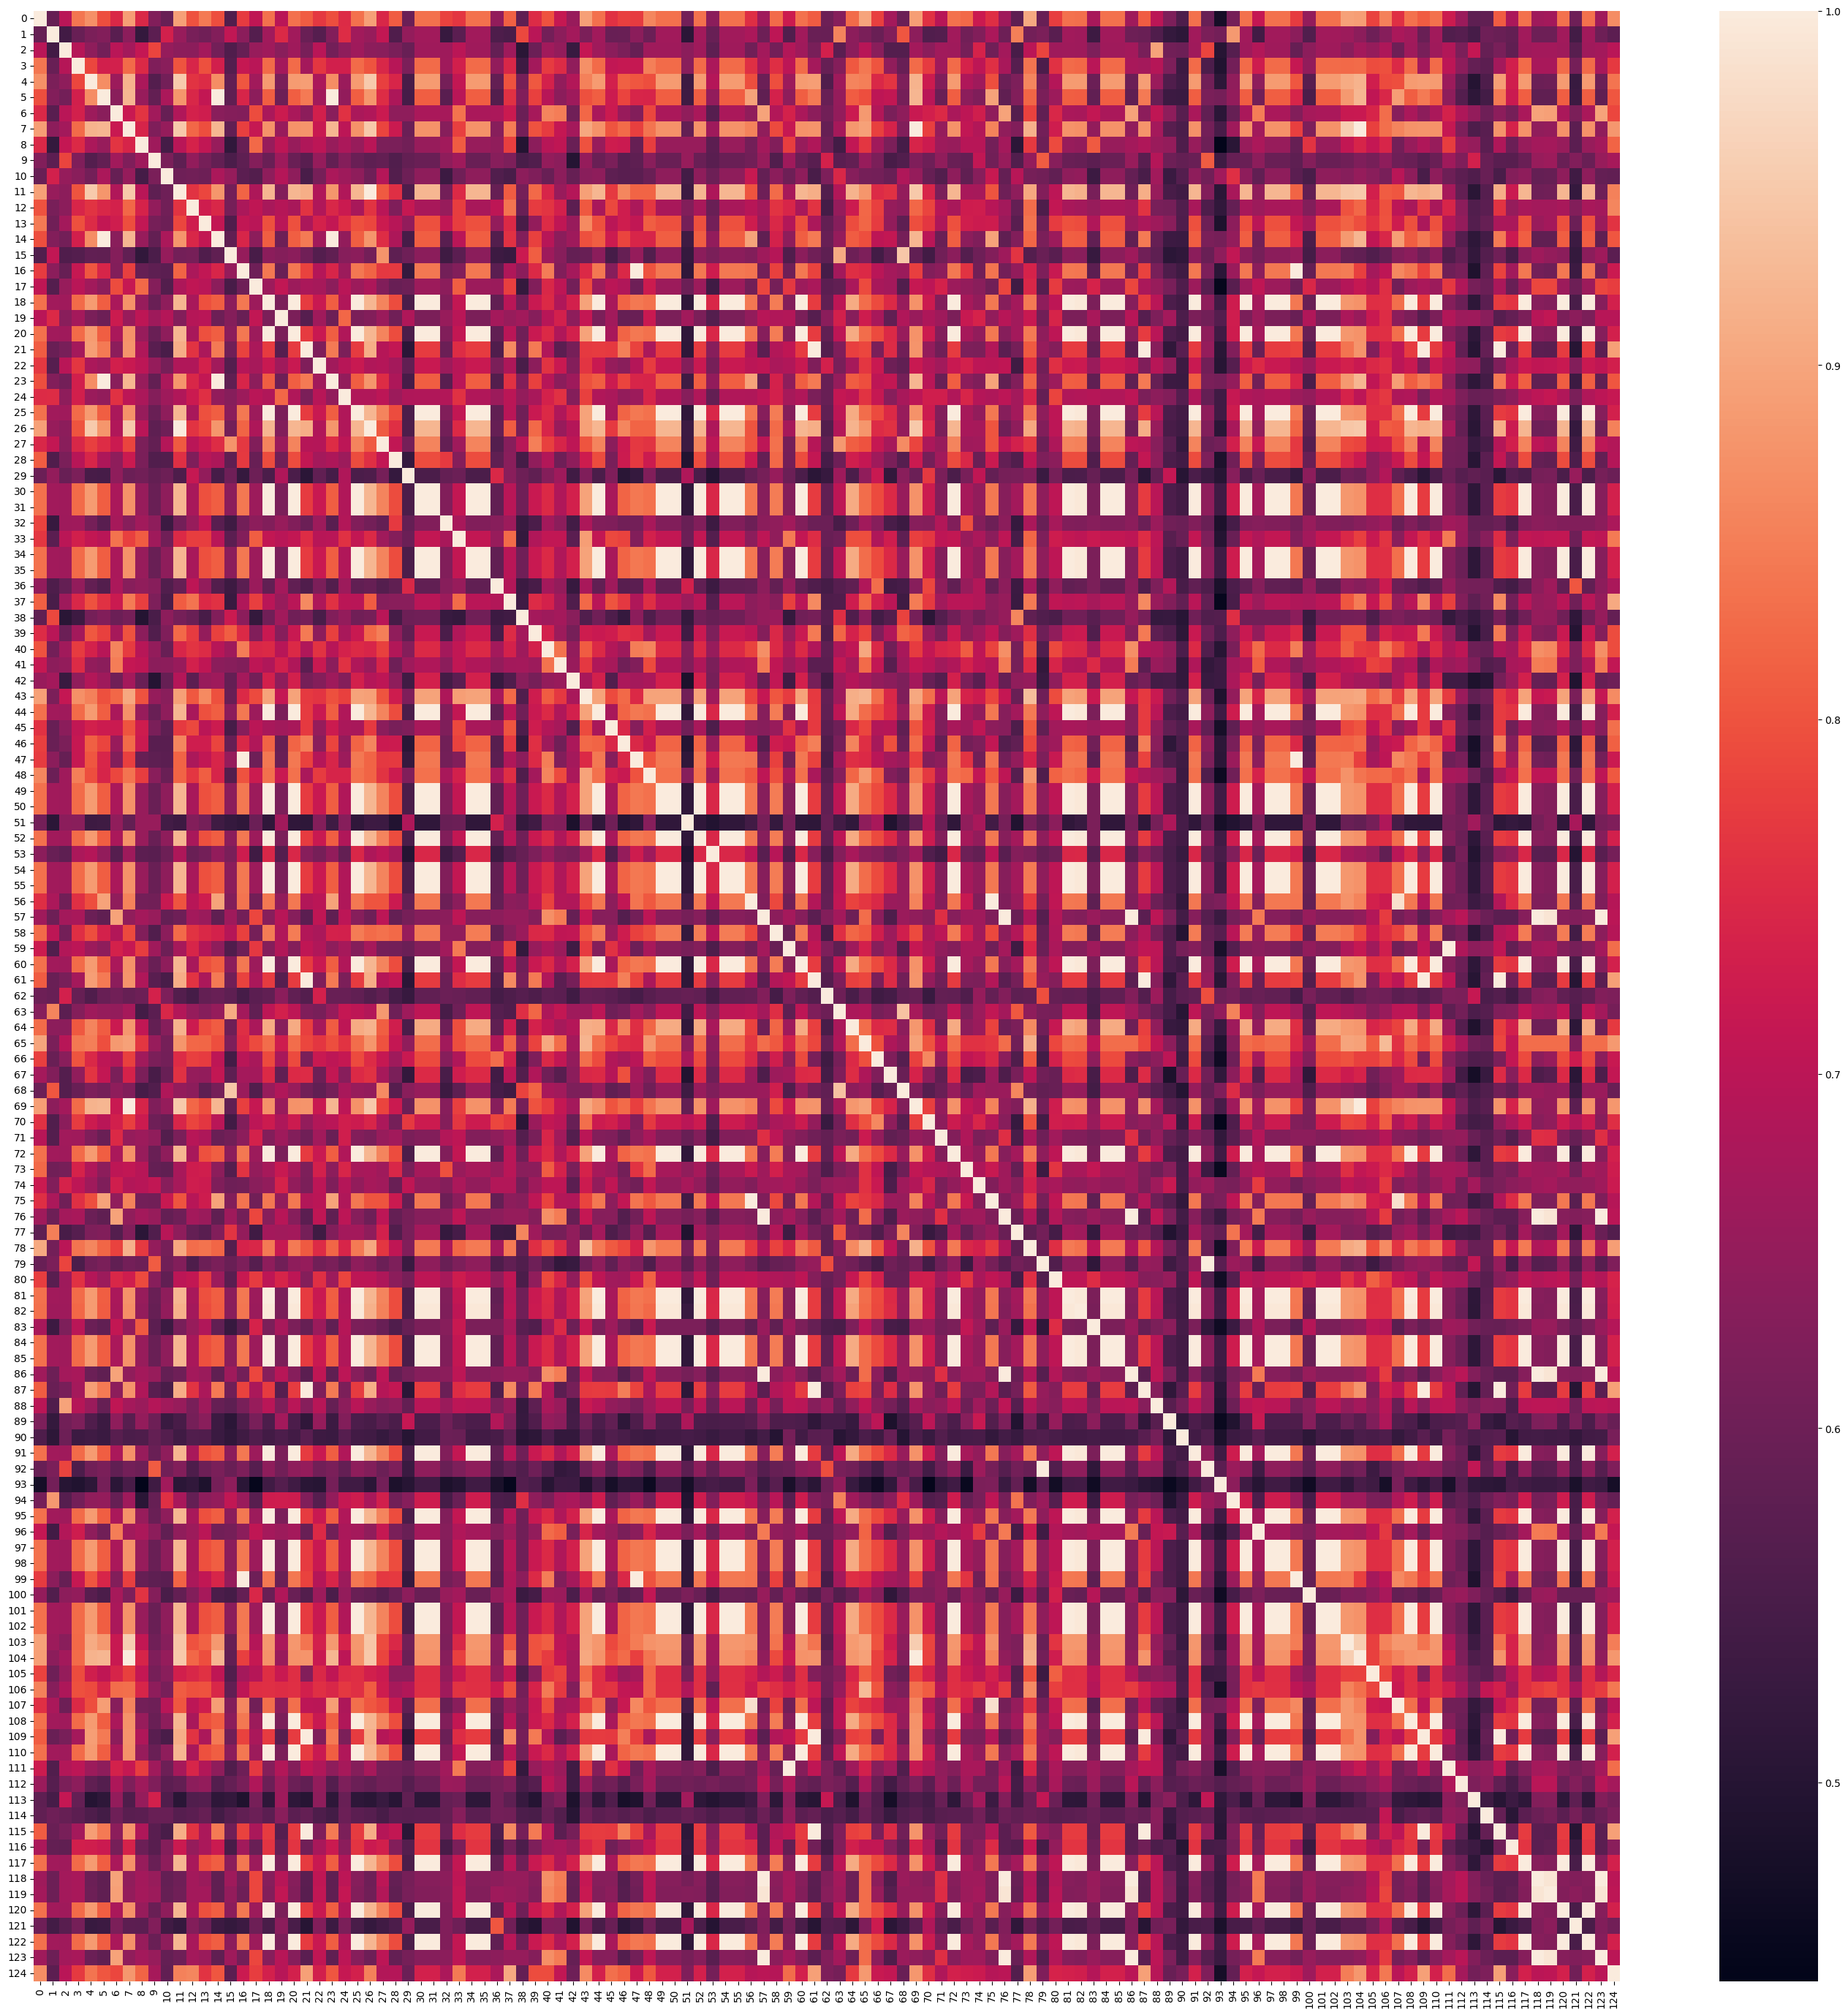

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(similaridad)

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Ajustar el modelo DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = clustering.fit_predict(interes_dentro_ia_embeddings)

In [ ]:
len(interes_dentro_ia), len(labels)

(126, 125)

In [ ]:
# Añadir los grupos al DataFrame
interes_dentro_ia['grupo'] = labels

,interes_dentro_ia_datos
0,"machine learning, big data, visión artificial"
1,"ml, dl, llm"
2,automatización con ia
3,machine learning y dirección de proyectos
4,"big data, maching learning"
...,...
121,"estoy conociendo aun, ninguna en específico"
122,machine learning
123,procesamiento de lenguaje natural
124,"big data, ingeniería de datos"


# Key words

In [62]:
dataset['interes_dentro_ia_datos']


count                  125
unique                  93
top       Machine Learning
freq                    12
Name: interes_dentro_ia_datos, dtype: object

In [ ]:
pip install google-generativeai

In [73]:
import google.generativeai as genai
df = pd.DataFrame(dataset)

# Función para extraer palabras clave usando Gemini
def extract_keywords(text):
    prompt = f"""Extrae palabras clave del siguiente texto, que está relacionado con ciencia de datos,
     machine learning y programación en general. Las palabras clave deben reflejar los conceptos más
     importantes y representativos de estos temas, si no encuentras palabras clave deja regresa una cadena vacia:
     '{text}'"""
    
    # Usar el modelo de Gemini para generar la respuesta
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    
    # La respuesta generada contiene las palabras clave, las extraemos
    return response.text.strip()

# Aplicar la función para extraer las palabras clave para cada registro
df['keywords'] = df['interes_dentro_ia_datos'].apply(extract_keywords)


In [74]:
# Mostrar los resultados
df[['keywords', 'interes_dentro_ia_datos']]

,keywords,interes_dentro_ia_datos
0,"Machine learning, Big data, Visión artificial","Machine learning, big data, visión artificial"
1,"Machine Learning (ML), Deep Learning (DL), Lar...","ML, DL, LLM"
2,"Automatización, IA (Inteligencia Artificial), ...",Automatización con IA
3,"Machine Learning, Dirección de Proyectos",Machine Learning y dirección de proyectos
4,"Big data, Machine Learning","Big data, Maching Learning"
...,...,...
120,Machine learning,Machine learning
121,"Ciencia de datos, machine learning, programación","Estoy conociendo aun, ninguna en específico"
122,Machine learning,Machine learning
123,Procesamiento del lenguaje natural,Procesamiento de lenguaje natural


In [ ]:
pip install wordcloud

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "Roboto-Regular.ttf"
text = " ".join(df['keywords'])

# Crear un mapa de palabras (word cloud)
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate(text)

# Mostrar el mapa de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Ocultar ejes
plt.show()

ValueError: Only supported for TrueType fonts